# Logistic Regression

In [1]:
# importing libraries  
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt  

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#importing datasets  
data = pd.read_csv('Data_FraminghamCity_Heart_Diseases.csv')  

In [3]:
data.shape

(4240, 16)

# Data Description
#### The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors. 

## Demographic:

#### Sex: male or female(Nominal)
#### Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
#### Behavioral

#### Current Smoker: whether or not the patient is a current smoker (Nominal)
#### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
## Medical( history)

#### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
#### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
#### Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
#### Diabetes: whether or not the patient had diabetes (Nominal)
## Medical(current)

#### Tot Chol: total cholesterol level (Continuous)
#### Sys BP: systolic blood pressure (Continuous)
#### Dia BP: diastolic blood pressure (Continuous)
#### BMI: Body Mass Index (Continuous)
#### Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of values.)
#### Glucose: glucose level (Continuous)
#### Predict variable (desired target)

#### 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.tail()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [7]:
data.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
data.isnull()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().any()

gender             False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [10]:
data.isnull().any().sum()

7

In [11]:
data.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
# Fill the missing values by Calculating Mean Values.
data["education"].fillna(data.groupby("age")["education"].transform("mean"), inplace=True)
data["education"].isnull().sum()

0

In [13]:
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [14]:
data["cigsPerDay"].fillna(data.groupby("currentSmoker")["cigsPerDay"].transform("mean"), inplace=True)
data["cigsPerDay"].isnull().sum()

0

In [15]:
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [16]:
data["BPMeds"].fillna(data.groupby("prevalentHyp")["BPMeds"].transform('median'), inplace=True)
data["BPMeds"].isnull().sum()

0

In [17]:
data["totChol"].fillna(data.groupby("prevalentStroke")["totChol"].transform("mean"), inplace=True)
data["totChol"].isnull().sum()

0

In [18]:
data["BMI"].fillna(data.groupby("age")["BMI"].transform("mean"), inplace=True)
data["BMI"].isnull().sum()

0

In [19]:
data["heartRate"].fillna(data.groupby("sysBP")["heartRate"].transform("mean"), inplace=True)
data["heartRate"].isnull().sum()

0

In [20]:
data["glucose"].fillna(data.groupby("diabetes")["glucose"].transform("mean"), inplace=True)
data["glucose"].isnull().sum()

0

In [21]:
data.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [22]:
data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
data.tail()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,79.487323,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.000000,0


# Data Co-Relation

In [24]:
data.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.029014,0.017432,0.197026,0.315941,-0.051544,-0.004550,0.005853,0.015693,-0.070064,-0.035879,0.058199,0.081560,-0.116842,0.006970,0.088374
age,-0.029014,1.000000,-0.168494,-0.213662,-0.192278,0.121011,0.057679,0.306799,0.101314,0.260691,0.394053,0.205586,0.137230,-0.012736,0.115184,0.225408
education,0.017432,-0.168494,1.000000,0.019835,0.009623,-0.010829,-0.035082,-0.081434,-0.039100,-0.023533,-0.129299,-0.061248,-0.136975,-0.052901,-0.033630,-0.053987
currentSmoker,0.197026,-0.213662,0.019835,1.000000,0.770882,-0.048348,-0.032980,-0.103710,-0.044285,-0.046211,-0.130281,-0.107933,-0.167691,0.062740,-0.052425,0.019448
cigsPerDay,0.315941,-0.192278,0.009623,0.770882,1.000000,-0.046521,-0.033056,-0.067109,-0.037881,-0.025251,-0.088293,-0.055936,-0.092859,0.076015,-0.053632,0.056284
BPMeds,-0.051544,0.121011,-0.010829,-0.048348,-0.046521,1.000000,0.114614,0.258580,0.051407,0.078775,0.251479,0.192254,0.099960,0.015126,0.048066,0.086448
prevalentStroke,-0.004550,0.057679,-0.035082,-0.032980,-0.033056,0.114614,1.000000,0.074791,0.006955,0.000105,0.057000,0.045153,0.029945,-0.017678,0.018070,0.061823
prevalentHyp,0.005853,0.306799,-0.081434,-0.103710,-0.067109,0.258580,0.074791,1.000000,0.077752,0.162683,0.696656,0.615840,0.301548,0.146867,0.082116,0.177458
diabetes,0.015693,0.101314,-0.039100,-0.044285,-0.037881,0.051407,0.006955,0.077752,1.000000,0.040161,0.111265,0.050260,0.086379,0.048976,0.625065,0.097344
totChol,-0.070064,0.260691,-0.023533,-0.046211,-0.025251,0.078775,0.000105,0.162683,0.040161,1.000000,0.207436,0.163423,0.114018,0.090653,0.044080,0.081807


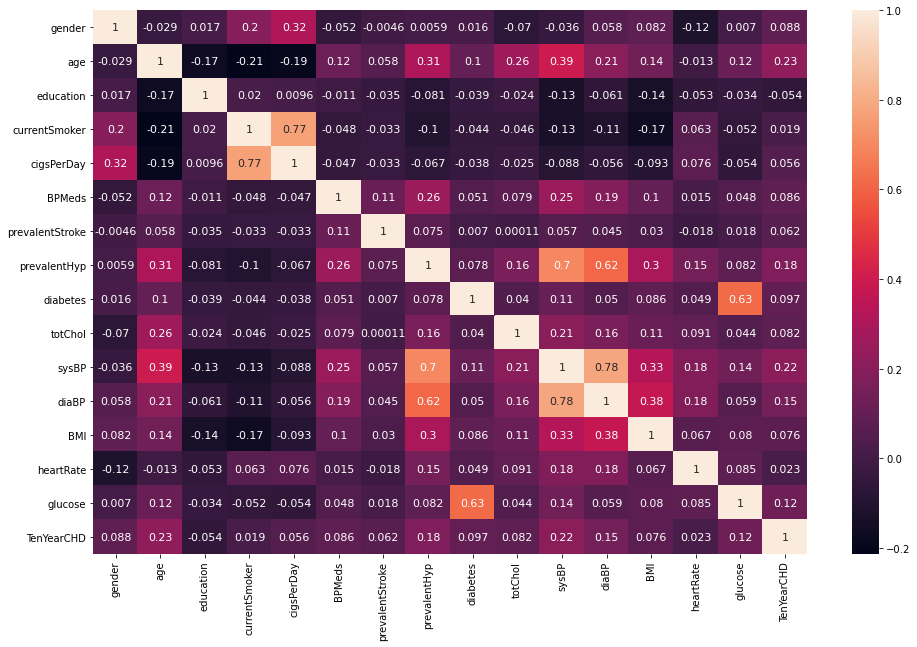

In [29]:
# HEAT MAP
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), annot=True,annot_kws={'size': 11} )
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Data Visuavalization

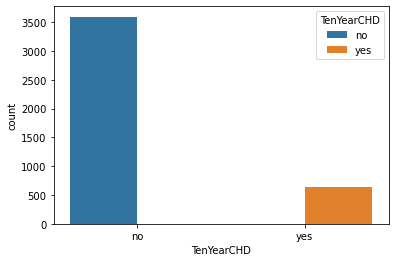

In [36]:
data['TenYearCHD']  = data['TenYearCHD'].replace({0: 'no', 1:'yes'})
sns.countplot(data=data, x='TenYearCHD', hue='TenYearCHD')

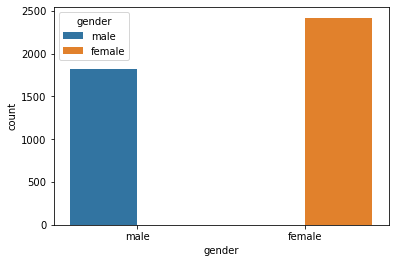

In [43]:
data['gender']  = data['gender'].replace({0: 'female', 1:'male'})
sns.countplot(data=data, x='gender', hue='gender')

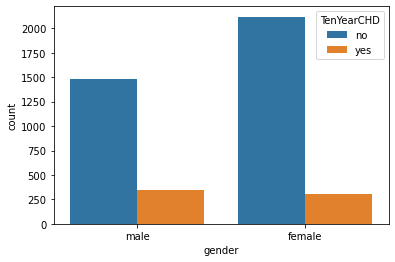

In [44]:
data['gender']  = data['gender'].replace({0: 'female', 1:'male'})
data = data.rename(columns={'male':'gender'})
sns.countplot(data=data, x='gender', hue='TenYearCHD')

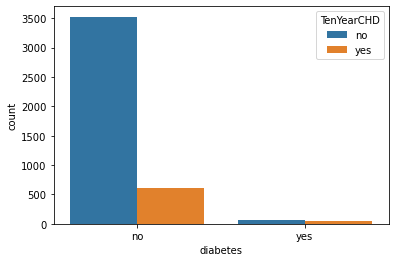

In [45]:
data['diabetes']  = data['diabetes'].replace({0: 'no', 1:'yes'})
sns.countplot(data=data, x='diabetes', hue='TenYearCHD')

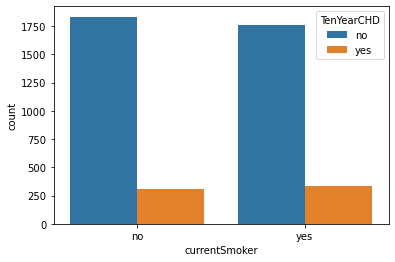

In [46]:
data['currentSmoker']  = data['currentSmoker'].replace({0: 'no', 1:'yes'})
sns.countplot(data=data, x='currentSmoker', hue='TenYearCHD')

In [47]:
data['age'].value_counts()

40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
68     18
34     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

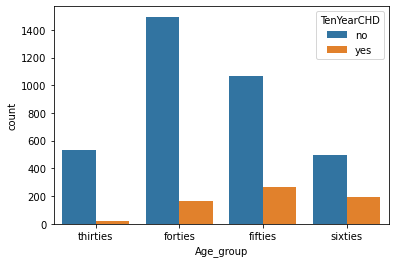

In [50]:
bins= [30,40,50,60,75]
labels = ['thirties','forties','fifties','sixties']

data['Age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
sns.countplot(data=data, x='Age_group', hue='TenYearCHD')


In [52]:
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_group
0,male,39,4.0,no,0.0,0.0,0,0,no,195.0,106.0,70.0,26.97,80.0,77.000000,no,thirties
1,female,46,2.0,no,0.0,0.0,0,0,no,250.0,121.0,81.0,28.73,95.0,76.000000,no,forties
2,male,48,1.0,yes,20.0,0.0,0,0,no,245.0,127.5,80.0,25.34,75.0,70.000000,no,forties
3,female,61,3.0,yes,30.0,0.0,0,1,no,225.0,150.0,95.0,28.58,65.0,103.000000,yes,sixties
4,female,46,3.0,yes,23.0,0.0,0,0,no,285.0,130.0,84.0,23.10,85.0,85.000000,no,forties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,female,48,2.0,yes,20.0,0.0,0,0,no,248.0,131.0,72.0,22.00,84.0,86.000000,no,forties
4236,female,44,1.0,yes,15.0,0.0,0,0,no,210.0,126.5,87.0,19.16,86.0,79.487323,no,forties
4237,female,52,2.0,no,0.0,0.0,0,0,no,269.0,133.5,83.0,21.47,80.0,107.000000,no,fifties
4238,male,40,3.0,no,0.0,0.0,0,1,no,185.0,141.0,98.0,25.60,67.0,72.000000,no,forties


In [53]:
data['cigsPerDay'].value_counts()

0.000000     2145
20.000000     734
30.000000     218
15.000000     210
10.000000     143
9.000000      130
5.000000      121
3.000000      100
40.000000      80
1.000000       67
43.000000      56
25.000000      55
18.356244      29
35.000000      22
2.000000       18
6.000000       18
7.000000       12
60.000000      11
8.000000       11
4.000000        9
18.000000       8
17.000000       7
23.000000       6
50.000000       6
11.000000       5
12.000000       3
13.000000       3
45.000000       3
16.000000       3
14.000000       2
19.000000       2
70.000000       1
38.000000       1
29.000000       1
Name: cigsPerDay, dtype: int64

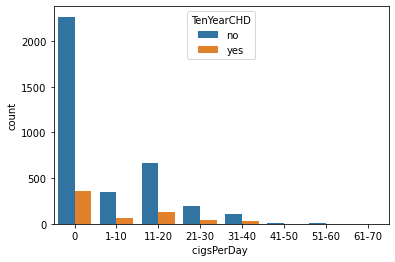

In [54]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

data['cigsPerDay '] = pd.cut(data['cigsPerDay'], bins=bins, labels=labels, right=False)

sns.countplot(data=data, x='cigsPerDay ', hue='TenYearCHD')

In [55]:
data

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Age_group,cigsPerDay
0,male,39,4.0,no,0.0,0.0,0,0,no,195.0,106.0,70.0,26.97,80.0,77.000000,no,thirties,0
1,female,46,2.0,no,0.0,0.0,0,0,no,250.0,121.0,81.0,28.73,95.0,76.000000,no,forties,0
2,male,48,1.0,yes,20.0,0.0,0,0,no,245.0,127.5,80.0,25.34,75.0,70.000000,no,forties,11-20
3,female,61,3.0,yes,30.0,0.0,0,1,no,225.0,150.0,95.0,28.58,65.0,103.000000,yes,sixties,21-30
4,female,46,3.0,yes,23.0,0.0,0,0,no,285.0,130.0,84.0,23.10,85.0,85.000000,no,forties,11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,female,48,2.0,yes,20.0,0.0,0,0,no,248.0,131.0,72.0,22.00,84.0,86.000000,no,forties,11-20
4236,female,44,1.0,yes,15.0,0.0,0,0,no,210.0,126.5,87.0,19.16,86.0,79.487323,no,forties,1-10
4237,female,52,2.0,no,0.0,0.0,0,0,no,269.0,133.5,83.0,21.47,80.0,107.000000,no,fifties,0
4238,male,40,3.0,no,0.0,0.0,0,1,no,185.0,141.0,98.0,25.60,67.0,72.000000,no,forties,0


In [56]:
#intialize model
lr = LogisticRegression()


In [57]:
features = data.drop('TenYearCHD', axis = 1)

In [58]:
tenyearchd =  data['TenYearCHD']
tenyearchd

0        no
1        no
2        no
3       yes
4        no
       ... 
4235     no
4236     no
4237     no
4238     no
4239     no
Name: TenYearCHD, Length: 4240, dtype: object

In [59]:
# train, test split......
X_train, X_test, y_train, y_test = train_test_split(features, tenyearchd, test_size=0.4, random_state = 42)

In [1]:
lr.fit(X_train,y_train)
#Extracting Independent and dependent Variable  
X = data['Year']

NameError: name 'lr' is not defined

In [61]:
predicted = lr.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [62]:
accuracy = accuracy_score(y_test, predicted)


NameError: name 'predicted' is not defined

In [63]:
c_m = confusion_matrix(y_test, predicted)


NameError: name 'predicted' is not defined

In [64]:
print('Accuracy score: ', accuracy, '\n', 'Confusion matrix: ', c_m)

NameError: name 'accuracy' is not defined

In [ ]:

[9]:
Year                             0
Population_India_in_thousands    0
India Population_in_Crores       0
Change                           1
Rate (%)                         1
dtype: int64
4. Encoding Categorical Data
There is no Categorical Data
5. Data splitting
[10]:
￼
#Extracting Independent and dependent Variable  
X = data['Year']